 # TF-IDF Vectorizer

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from util import summary_report

 ## Read the data

In [2]:
df = pd.read_csv("../../data/cleaned_reviews.tsv", sep="\t")

 ## Defining a helpful review + Splitting the data

In [3]:
split = 0.01

df["helpful"] = np.where(df.voteSuccess >= split, 1, 0)

x_train, x_test, y_train, y_test = train_test_split(
    df.reviewText, df.helpful, test_size=0.25, random_state=30
)
f"x_train: {x_train.shape}, y_train: {y_train.shape}, x_test: {x_test.shape}, y_test: {y_test.shape}"

'x_train: (107391,), y_train: (107391,), x_test: (35797,), y_test: (35797,)'

 ## Vectorization with TF-IDF

In [4]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1), min_df=0.01)
tfidf_train = vectorizer.fit_transform(x_train.values.astype("U"))
tfidf_test = vectorizer.transform(x_test.values.astype("U"))

 ## Fitting

 ## Support-Vector Machine

In [5]:
clf = LinearSVC(random_state=0, max_iter=5000)

clf.fit(tfidf_train, y_train)
y_test_pred = clf.predict(tfidf_test)

Document-term Matrix(TF-IDF Vectorizer) - SVM/SVC
              precision    recall  f1-score   support

   Unhelpful       0.87      0.99      0.93     30717
     Helpful       0.65      0.07      0.12      5080

    accuracy                           0.86     35797
   macro avg       0.76      0.53      0.52     35797
weighted avg       0.84      0.86      0.81     35797
 
Balanced acc score:  0.53053 
Balanced acc score(luck adjusted):  0.06107
Youden Index:  0.06107


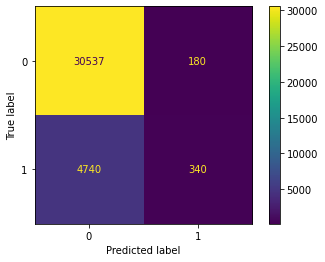

In [6]:
summary_report(y_test, y_test_pred, "Document-term Matrix(TF-IDF Vectorizer) - SVM/SVC")

 ## RandomForestClassifier

In [7]:
rfc = RandomForestClassifier(
    n_estimators=150, max_depth=150, random_state=0, n_jobs=-1, verbose=True
)
rfc.fit(tfidf_train, y_train)
y_test_pred = rfc.predict(tfidf_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.3s finished


Document-term Matrix(TF-IDF Vectorizer) - RandomForestClassifier
              precision    recall  f1-score   support

   Unhelpful       0.87      0.99      0.92     30717
     Helpful       0.59      0.08      0.14      5080

    accuracy                           0.86     35797
   macro avg       0.73      0.54      0.53     35797
weighted avg       0.83      0.86      0.81     35797
 
Balanced acc score:  0.53603 
Balanced acc score(luck adjusted):  0.07205
Youden Index:  0.07205


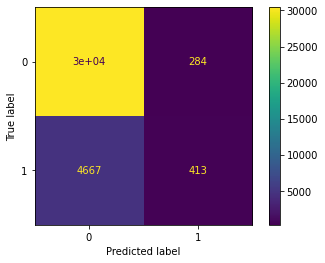

In [8]:
summary_report(
    y_test,
    y_test_pred,
    "Document-term Matrix(TF-IDF Vectorizer) - RandomForestClassifier",
)

 ## LogisticRegression

In [9]:
lgr = LogisticRegression(random_state=0, max_iter=10000)
lgr.fit(tfidf_train, y_train)
y_test_pred = lgr.predict(tfidf_test)

Document-term Matrix(TF-IDF Vectorizer) - LogisticRegression
              precision    recall  f1-score   support

   Unhelpful       0.87      0.98      0.93     30717
     Helpful       0.60      0.14      0.23      5080

    accuracy                           0.86     35797
   macro avg       0.74      0.56      0.58     35797
weighted avg       0.84      0.86      0.83     35797
 
Balanced acc score:  0.56172 
Balanced acc score(luck adjusted):  0.12344
Youden Index:  0.12344


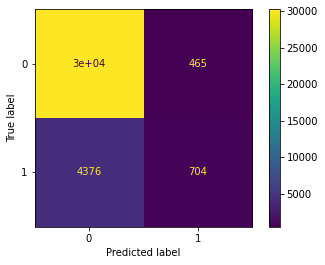

In [10]:
summary_report(
    y_test, y_test_pred, "Document-term Matrix(TF-IDF Vectorizer) - LogisticRegression"
)

 # Neural Network

In [11]:
from sklearn.neural_network import MLPClassifier

# Using lbfgs over adam as it is much faster on smaller datasets(1min vs 6min(42k samples on M1 macbook air))
clf = MLPClassifier(
    solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(100,), max_iter=1000, random_state=1
)

clf.fit(tfidf_train, y_train)
y_test_pred = clf.predict(tfidf_test)

/home/nullxdeadbeef/.cache/pypoetry/virtualenvs/amazon-sentiment-jA8IenIW-py3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier
              precision    recall  f1-score   support

   Unhelpful       0.88      0.89      0.89     30717
     Helpful       0.31      0.29      0.30      5080

    accuracy                           0.81     35797
   macro avg       0.59      0.59      0.59     35797
weighted avg       0.80      0.81      0.80     35797
 
Balanced acc score:  0.59058 
Balanced acc score(luck adjusted):  0.18117
Youden Index:  0.18117


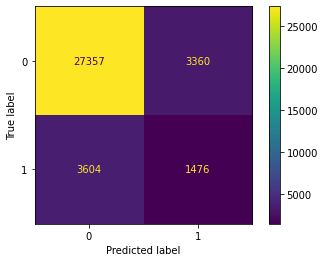

In [12]:
summary_report(y_test, y_test_pred, "MLPClassifier")

 # KMeans clustering

MLPClassifier
              precision    recall  f1-score   support

   Unhelpful       0.85      0.89      0.87     30717
     Helpful       0.05      0.03      0.04      5080

    accuracy                           0.77     35797
   macro avg       0.45      0.46      0.45     35797
weighted avg       0.73      0.77      0.75     35797
 
Balanced acc score:  0.45956 
Balanced acc score(luck adjusted):  -0.08088
Youden Index:  -0.08088


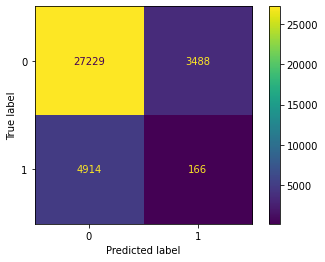

In [13]:
clf = KMeans(n_clusters=2, init="k-means++", max_iter=100, n_init=5, random_state=5)

clf.fit(tfidf_train, y_train)
y_test_pred = clf.predict(tfidf_test)

summary_report(y_test, y_test_pred, "MLPClassifier")